In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from skimpy import skim 

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', 999)
pd.options.display.float_format = '{:,.2f}'.format

### EDA

In [4]:
df = pd.read_excel(r'C:\Users\YIL\Desktop\TRAVAIL\Apprentissage\datasets\store-retail\online_retail_II.xlsx', sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,"13,085.00",United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,"13,085.00",United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,"13,085.00",United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,"13,085.00",United Kingdom


In [5]:
df_eda = df.copy()

In [6]:
skim(df_eda)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 525461 │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA     ┃ NA %              ┃ mean  ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Quantity    │      0 │                 0 │ 10.34 │ 107.4 │  -9600 │     1 │     3 │    10 │ 19150 │    ▇   │  │
│ │ Price       │      0 │                 0 │ 4.689 │ 146.1 │ -53590 │  1.25 │   2.1 │  4.21 │ 25110 │     ▇  │  │
│ │ Customer ID │ 107927 │ 20.53948818275761 │ 15360 │  1681 │  12350 │ 13980 │ 15310 │ 16800 │ 18290 │ ▇▆▇▇▇▇ │  │
│ │             │        │                 6 │       │       │        │       │       │       │       │        │  │
│ └─────────────┴────────┴───────────────────┴───────┴───────┴────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column           ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ InvoiceDate      │    0 │       0 │    2009-12-01 07:45:00     │    2010-12-09 20:01:00     │ None         │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃         ┃    ┃      ┃          ┃            ┃           ┃            ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column  ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max        ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Country │  0 │    0 │ USA      │ United     │ Australia │ West       │       13.5 │       1.9 │    1013213 │  │
│ │         │    │      │          │ Arab       │           │ Indies     │            │           │            │  │
│ │         │    │      │          │ Emirates   │           │            │            │           │            │  │
│ └─────────┴────┴──────┴──────────┴────────────┴───────────┴────────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── 

In [7]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In "Customer ID", there are about 110000 NaN values. 

In [8]:
df_eda[df_eda['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
df_eda[df_eda['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,"16,321.00",Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,"16,321.00",Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,"16,321.00",Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,"16,321.00",Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,"17,592.00",United Kingdom


'Quantity' is negatif means this is a cancellation.

In [10]:
# InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. 
# If this code starts with the letter 'c', it indicates a cancellation. 
# Check the invoice number with letters
df_eda['Invoice'] = df_eda['Invoice'].astype('str')
df_eda[df_eda['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,"16,321.00",Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,"16,321.00",Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,"16,321.00",Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,"12,605.00",Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,"15,329.00",United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,"15,329.00",United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,"15,329.00",United Kingdom


In [11]:
# Check if "C" is the only letter appearing in the Invoice 
df_eda['Invoice'].str[0].unique()

array(['4', 'C', '5', 'A'], dtype=object)

In [12]:
# Find if the C-invoice has another pair of invoice (C538164 - 538164)
# if a e cancellation correpond to a transaction
number_C = df_eda[df_eda['Invoice'].str.startswith('C') == True]['Invoice'].tolist()
number = set(i.strip('C') for i in number_C)

df_eda[df_eda['Invoice'].isin(number)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [13]:
# Find the Invoice begins with "A"
df_eda[df_eda['Invoice'].str.startswith('A') == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,"-53,594.36",NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,"-44,031.79",NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,"-38,925.87",NaN,United Kingdom


In [14]:
# Check if the A Invoice has a pair of Invoice ( ex: A506401 - 506401)
number_A = df_eda[df_eda['Invoice'].str.match('A') == True]['Invoice'].tolist()
number = [i.strip('A') for i in number_A]

df_eda[df_eda['Invoice'].isin(number)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


So C and A Invoice have their own number and there is no intreset to keep A-invoice / C-invoice since we find the Customer_ID is NaN and they are unique. So we can drop the rows where Customer_ID is NaN

Check the "StockCode" Colum:

In [15]:
# The description of "StockCode" is:
# StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
# We need to check if there are exceptions 

df_eda['StockCode'] = df_eda['StockCode'].astype('str')
df_eda[df_eda['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,"13,078.00",United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,"13,078.00",United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,"13,078.00",United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,"13,969.00",United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,"13,969.00",United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,"13,969.00",United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,"17,530.00",United Kingdom


In [16]:
# This step check if there are non-numeric StockCode
df_eda[(df_eda['StockCode'].str.match('^\\d{5}$') == False) & (df_eda['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

It seems that the non-numeric StockCode are too complicated, so we'll drop them 

In [17]:
# Check if the StockCode with letter have their unique number
# We exclude the numeric only and letter only StockCode:
StockCode_letter = df_eda[
    (df_eda['StockCode'].str.match('^\\d{5}$') == False) 
    & (df_eda['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == True)
    ]['StockCode'].to_list()

# Remove the letter and keep number only
StockCode = [i[:-1] for i in StockCode_letter]

df_eda[df_eda['StockCode'].isin(StockCode)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41,489437,10002,INFLATABLE POLITICAL GLOBE,12,2009-12-01 09:08:00,0.85,"15,362.00",United Kingdom
1329,489562,47566,PARTY BUNTING,1,2009-12-01 13:07:00,4.65,"17,998.00",United Kingdom
2869,489635,47566,PARTY BUNTING,5,2009-12-01 15:26:00,4.65,"16,763.00",United Kingdom
3176,489664,79323G,GOLD CHERRY LIGHTS,5,2009-12-01 18:03:00,6.75,"14,061.00",United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524863,538148,47566,PARTY BUNTING,1,2010-12-09 16:26:00,9.32,NaN,United Kingdom
524975,538149,47566,PARTY BUNTING,1,2010-12-09 16:27:00,9.32,NaN,United Kingdom
525005,538151,47566,PARTY BUNTING,50,2010-12-09 16:28:00,3.75,"16,163.00",United Kingdom
525142,538154,47566,PARTY BUNTING,2,2010-12-09 16:35:00,9.32,NaN,United Kingdom


And yes, there are digital-only Stockcode share the same number with StockCode with a letter 

In [18]:
# Find an example:
df_eda[df_eda['StockCode'].str.contains('^84292')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
8231,490074,84292,ROSE PINK METAL FOLDING CHAIR,1,2009-12-03 14:39:00,26.04,NaN,United Kingdom
22707,491155,84292,ROSE PINK METAL FOLDING CHAIR,1,2009-12-10 09:49:00,26.04,NaN,United Kingdom
45619,493446,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-01-04 14:00:00,7.95,"17,807.00",United Kingdom
60914,494811,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-01-18 16:47:00,7.95,"14,343.00",United Kingdom
74075,496082,84292B,NaN,3,2010-01-28 17:54:00,0.00,NaN,United Kingdom
91277,497988,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-02-15 14:15:00,7.95,NaN,United Kingdom
91278,497988,84292B,BLUE COL METAL FOLDING CHAIR,1,2010-02-15 14:15:00,7.95,NaN,United Kingdom
94320,498261,84292,ROSE PINK METAL FOLDING CHAIR,2,2010-02-17 14:47:00,7.95,"16,938.00",United Kingdom
114259,500322,84292,ROSE PINK METAL FOLDING CHAIR,2,2010-03-07 12:06:00,7.95,"16,798.00",United Kingdom


So the StockCode with or without letter can describe the same thing, we can't know the meanding of letter behind.

In [19]:
# Check the country columns 
df_eda['Country'].value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


In [20]:
df_eda['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

### Data Cleaning 

In [21]:
df_cleaned = df.copy()

We'll drop what we found in the EDA:

In [22]:
df_cleaned[['Invoice', 'StockCode']] = df_cleaned[['Invoice', 'StockCode']].astype('str')

# Keep the 6-digital invoice only 
df_cleaned = df_cleaned[df_cleaned['Invoice'].str.match('^\\d{6}$') == True]
# Keep the 5-digital stockcode and "5-digital + letter" stockcode only  
df_cleaned = df_cleaned[
    (df_cleaned['StockCode'].str.match('^\\d{5}$') == True) 
    | (df_cleaned['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True)
]

In [23]:
# Drop the rows without Customer ID
df_cleaned.dropna(subset=['Customer ID'], inplace=True)

In [24]:
df_cleaned.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"406,323.00",406323,"406,323.00","406,323.00"
mean,13.62,2010-07-01 10:14:46.649094656,2.99,"15,373.66"
min,1.00,2009-12-01 07:45:00,0.00,"12,346.00"
25%,2.00,2010-03-26 14:01:00,1.25,"14,004.00"
50%,5.00,2010-07-09 15:48:00,1.95,"15,326.00"
75%,12.00,2010-10-14 17:09:00,3.75,"16,814.00"
max,"19,152.00",2010-12-09 20:01:00,295.00,"18,287.00"
std,97.00,NaN,4.29,"1,677.37"


In [25]:
# Accroding to the .describe(), the min Price is 0, we can drop them too: 
df_cleaned.drop(df_cleaned[df_cleaned['Price'] == 0].index, inplace=True) 

In [26]:
print(f'With the date cleaning, we keep {len(df_cleaned) / len(df) : .2%} of dataset.')

With the date cleaning, we keep  77.32% of dataset.


### Date processing

In [27]:
# Since the Price means Unit price, we need to add the total price of each invoice
df_cleaned['TotalPrice'] = df_cleaned['Price']*df_cleaned['Quantity']

Calculate the period of days between every purchase per customer : as we don't know if the purchase is regular or not, we need to calculate the interval between each purchase of each customer, then add them on, divided by the frequency of customer.

In [28]:
# Group the rows by each customer and date  
df_agg_1 = df_cleaned.groupby(['Customer ID', 'InvoiceDate'], as_index=False).agg(
    SumTotalPrice = ('TotalPrice', 'sum'))

# .shift() creates a new date column that retrieves the previous pruchase date of a customer 
df_agg_1['PrevDate'] = df_agg_1.groupby('Customer ID')['InvoiceDate'].shift(1)

# Calculate the interval between 2 purchases, the purchase taken place in one day will get NaN 
df_agg_1['DateDiff'] = (df_agg_1['InvoiceDate'] - df_agg_1['PrevDate']).dt.days

df_agg_1

,Customer ID,InvoiceDate,SumTotalPrice,PrevDate,DateDiff
0,"12,346.00",2010-03-02 13:08:00,27.05,NaT,NaN
1,"12,346.00",2010-06-28 13:53:00,142.31,2010-03-02 13:08:00,118.00
2,"12,347.00",2010-10-31 14:20:00,611.53,NaT,NaN
3,"12,347.00",2010-12-07 14:57:00,711.79,2010-10-31 14:20:00,37.00
4,"12,348.00",2010-09-27 14:59:00,221.16,NaT,NaN
...,...,...,...,...,...
18928,"18,286.00",2010-08-20 11:57:00,833.48,2009-12-16 10:45:00,247.00
18929,"18,287.00",2010-05-17 11:55:00,"1,071.61",NaT,NaN
18930,"18,287.00",2010-09-21 12:17:00,862.00,2010-05-17 11:55:00,127.00
18931,"18,287.00",2010-09-21 12:19:00,30.60,2010-09-21 12:17:00,0.00


In [29]:
# Get the average period of days between 2 purchase per customer 
interval_purchase = df_agg_1.groupby('Customer ID')['DateDiff'].mean().reset_index()
interval_purchase.rename(columns={'DateDiff' : 'Interval_purchase'}, inplace=True)

In [ ]:
# Craete a new column to indicate if a customer purchase at the first time or not 
interval_purchase['NewCustomer'] = np.where(interval_purchase['Interval_purchase'].isna(), 1, 0)

interval_purchase

,Customer ID,Interval_purchase,NewCustomer
0,"12,346.00",118.00,0
1,"12,347.00",37.00,0
2,"12,348.00",NaN,1
3,"12,349.00",181.00,0
4,"12,351.00",NaN,1
...,...,...,...
4280,"18,283.00",54.60,0
4281,"18,284.00",NaN,1
4282,"18,285.00",NaN,1
4283,"18,286.00",247.00,0


In [ ]:
# Aggregate the Price and count distinctly the invoice per customer
df_agg_2 = df_cleaned.copy()
df_agg_2['Combined'] = df_agg_2['StockCode'] + "_" + df_agg_2['InvoiceDate'].astype('str')

In [32]:
df_agg_2 = df_agg_2.groupby('Customer ID', as_index=False).agg(
    SumTotalPrice = ('TotalPrice', 'sum'),
    Frequency = ('InvoiceDate', 'nunique'),
    Nb_invoice = ('Combined', 'nunique')
)

df_agg = pd.merge(df_agg_2, interval_purchase, on='Customer ID')

In [ ]:
df_agg['Interval_purchase'] = df_agg['Interval_purchase'].fillna(0)

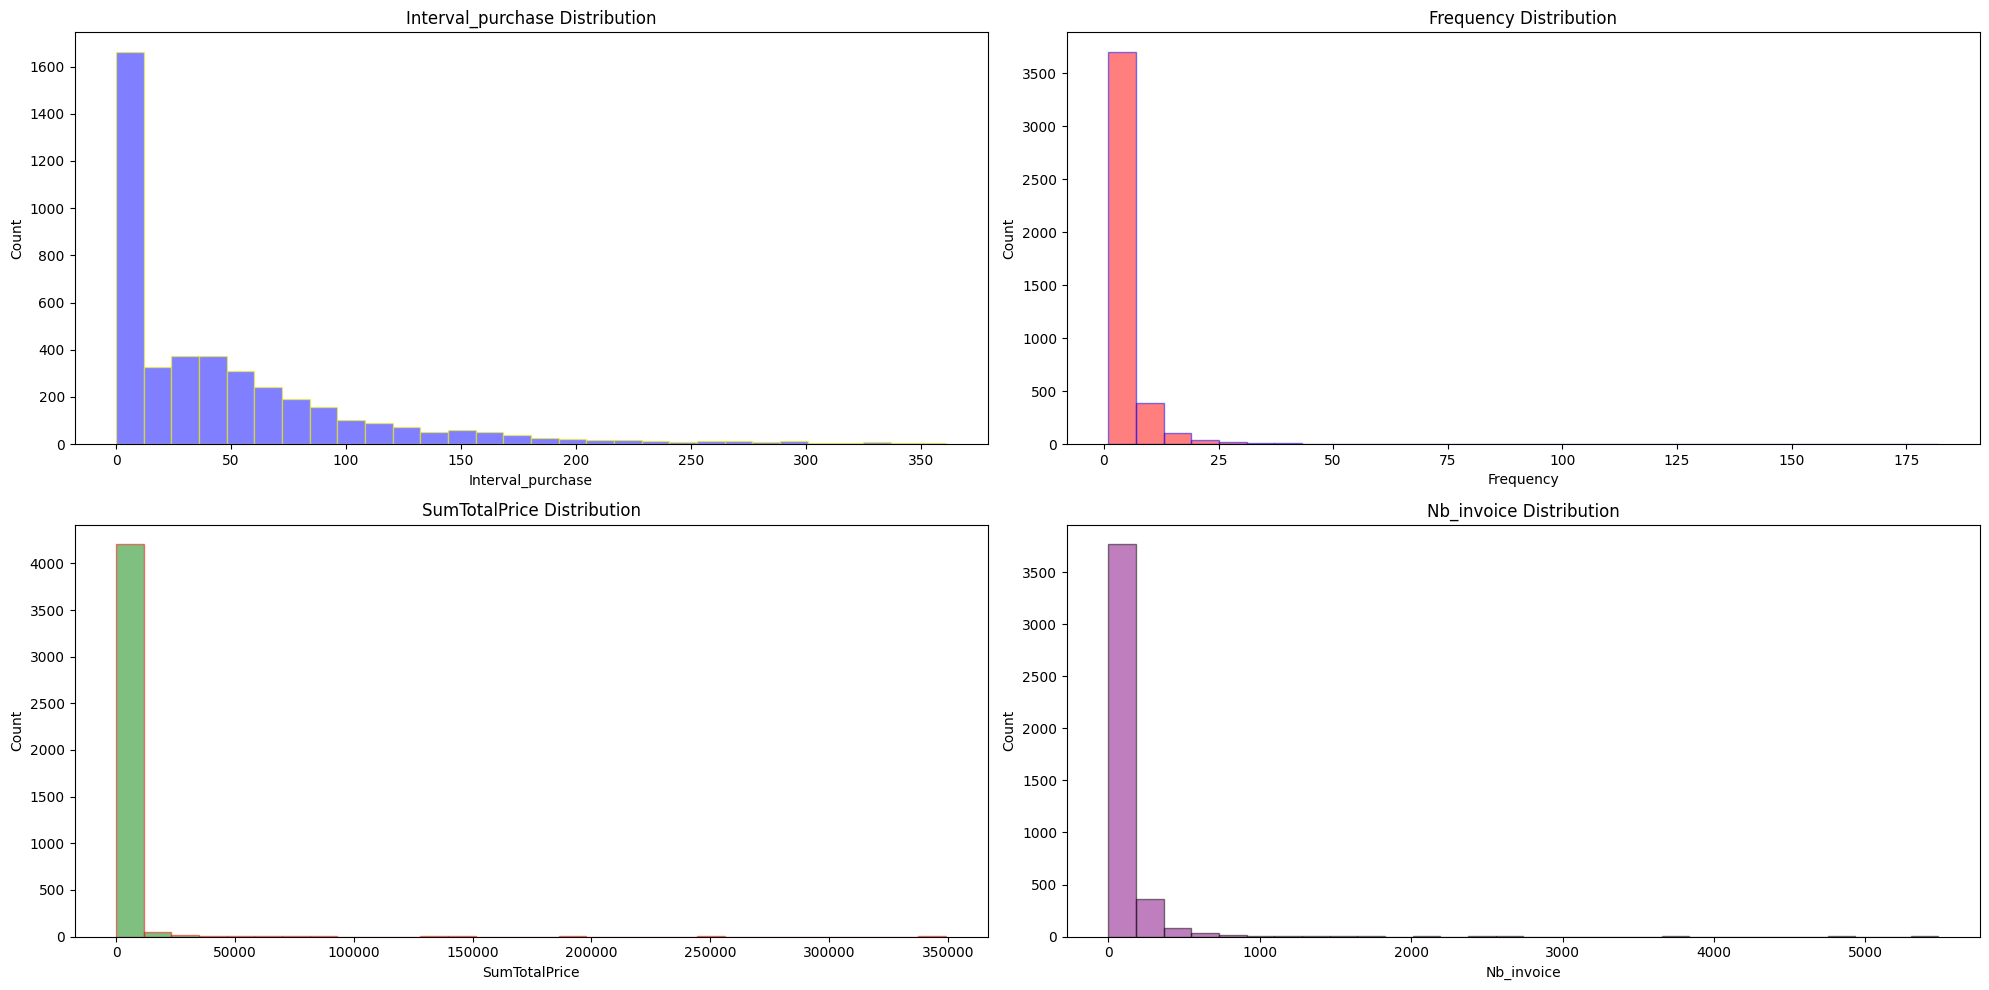

In [ ]:
# Check the distribution 
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df_agg['Interval_purchase'], bins=30, color='blue', alpha=0.5, edgecolor='yellow')
plt.xlabel('Interval_purchase')
plt.ylabel('Count')
plt.title('Interval_purchase Distribution')

plt.subplot(2,2,2)
plt.hist(df_agg['Frequency'], bins=30, color='red', alpha=0.5, edgecolor='blue')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')

plt.subplot(2,2,3)
plt.hist(df_agg['SumTotalPrice'], bins=30, color='green', alpha=0.5, edgecolor='red')
plt.xlabel('SumTotalPrice')
plt.ylabel('Count')
plt.title('SumTotalPrice Distribution')

plt.subplot(2,2,4)
plt.hist(df_agg['Nb_invoice'], bins=30, color='purple', alpha=0.5, edgecolor='black')
plt.xlabel('Nb_invoice')
plt.ylabel('Count')
plt.title('Nb_invoice Distribution')

plt.tight_layout()
plt.show()

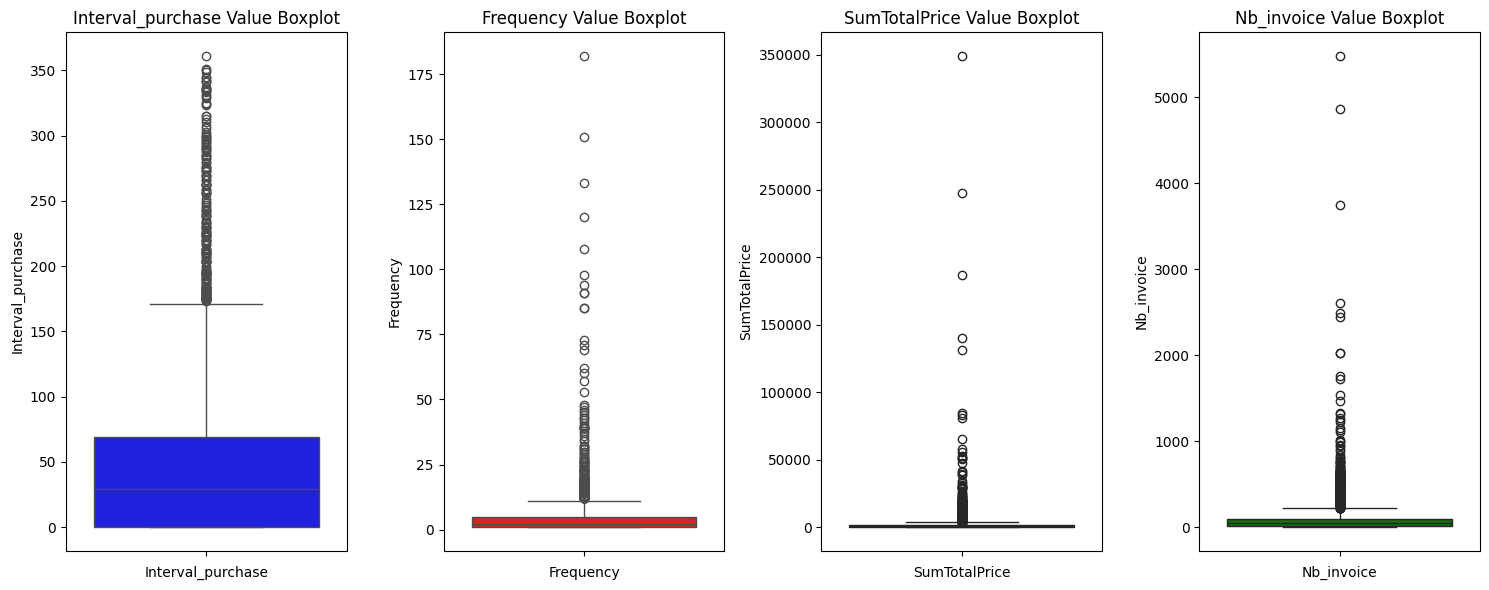

In [36]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(df_agg['Interval_purchase'], color='blue')
plt.xlabel('Interval_purchase')
plt.title('Interval_purchase Value Boxplot')

plt.subplot(1,4,2)
sns.boxplot(df_agg['Frequency'], color='red')
plt.xlabel('Frequency')
plt.title('Frequency Value Boxplot')

plt.subplot(1,4,3)
sns.boxplot(df_agg['SumTotalPrice'], color='green')
plt.xlabel('SumTotalPrice')
plt.title('SumTotalPrice Value Boxplot')

plt.subplot(1,4,4)
sns.boxplot(df_agg['Nb_invoice'], color='green')
plt.xlabel('Nb_invoice')
plt.title('Nb_invoice Value Boxplot')

plt.tight_layout()
plt.show()

In [37]:
df_agg[['SumTotalPrice', 'Frequency', 'Interval_purchase', 'Nb_invoice']].describe()

,SumTotalPrice,Frequency,Interval_purchase,Nb_invoice
count,"4,285.00","4,285.00","4,285.00","4,285.00"
mean,"2,024.13",4.42,47.20,91.86
std,"8,813.95",7.88,60.75,195.77
min,1.55,1.00,0.00,1.00
25%,307.56,1.00,0.00,18.00
50%,702.90,2.00,29.00,43.00
75%,"1,704.29",5.00,69.00,100.00
max,"349,164.35",182.00,361.00,"5,483.00"


In [38]:
fig = px.scatter_3d(df_agg, x='SumTotalPrice', y='Nb_invoice', z='Interval_purchase')
fig.show()

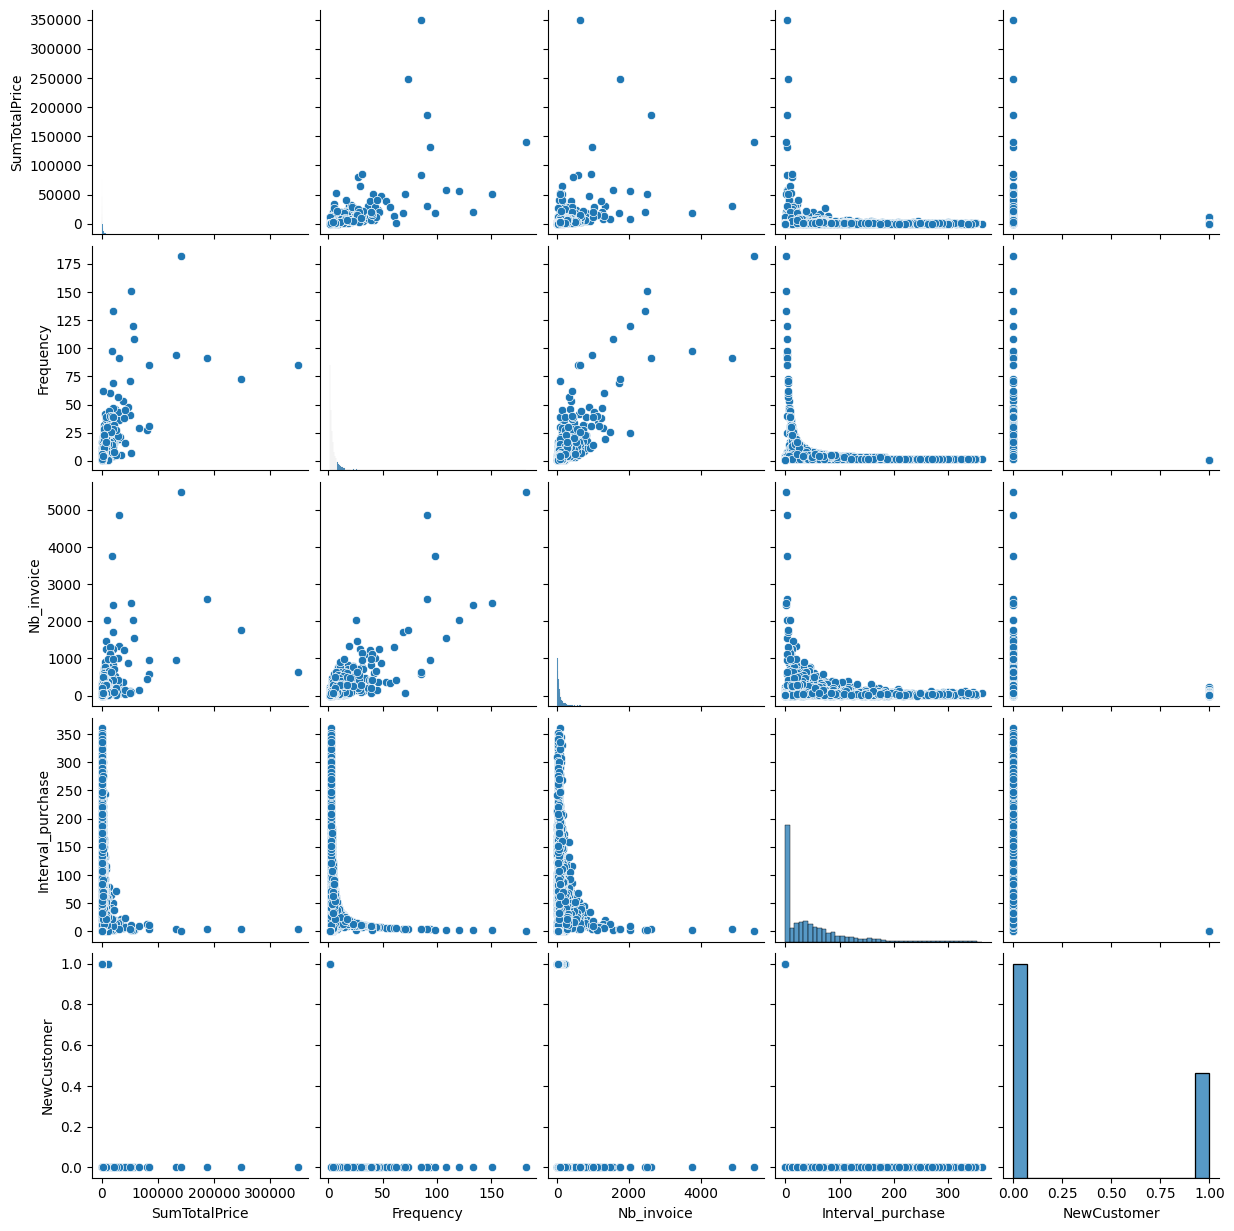

In [39]:
sns.pairplot(df_agg.drop(['Customer ID'], axis=1))

#### Log-transformed variables 

In [43]:
df_agg_log = df_agg.copy()

# Use the log transformation to adjust extrem values of each variable
df_agg_log['Frequency'] = np.log1p(df_agg_log['Frequency'])
df_agg_log['SumTotalPrice'] = np.log1p(df_agg_log['SumTotalPrice'])
df_agg_log['Interval_purchase'] = np.log1p(df_agg_log['Interval_purchase'])
df_agg_log['Nb_invoice'] = np.log1p(df_agg_log['Nb_invoice'])

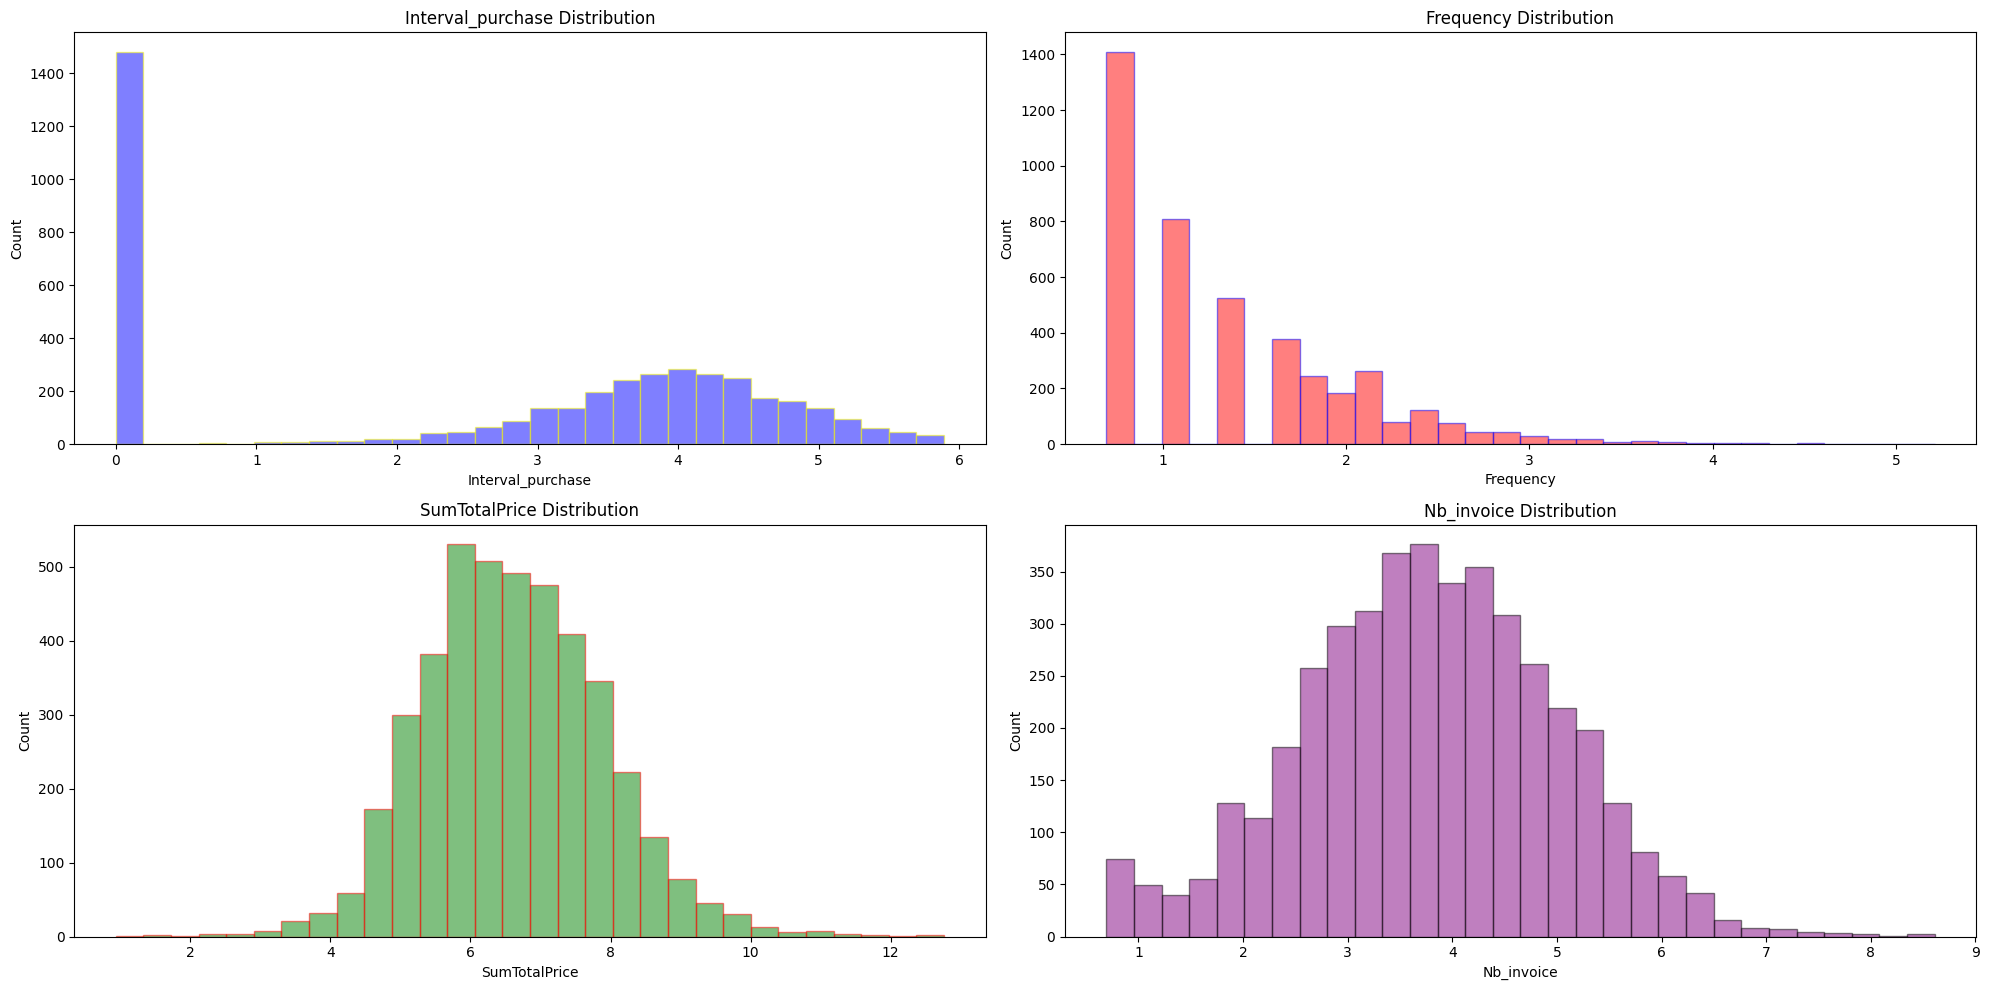

In [44]:
# The distribution after the log transformation 
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df_agg_log['Interval_purchase'], bins=30, color='blue', alpha=0.5, edgecolor='yellow')
plt.xlabel('Interval_purchase')
plt.ylabel('Count')
plt.title('Interval_purchase Distribution')

plt.subplot(2,2,2)
plt.hist(df_agg_log['Frequency'], bins=30, color='red', alpha=0.5, edgecolor='blue')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')

plt.subplot(2,2,3)
plt.hist(df_agg_log['SumTotalPrice'], bins=30, color='green', alpha=0.5, edgecolor='red')
plt.xlabel('SumTotalPrice')
plt.ylabel('Count')
plt.title('SumTotalPrice Distribution')

plt.subplot(2,2,4)
plt.hist(df_agg_log['Nb_invoice'], bins=30, color='purple', alpha=0.5, edgecolor='black')
plt.xlabel('Nb_invoice')
plt.ylabel('Count')
plt.title('Nb_invoice Distribution')

plt.tight_layout()
plt.show()

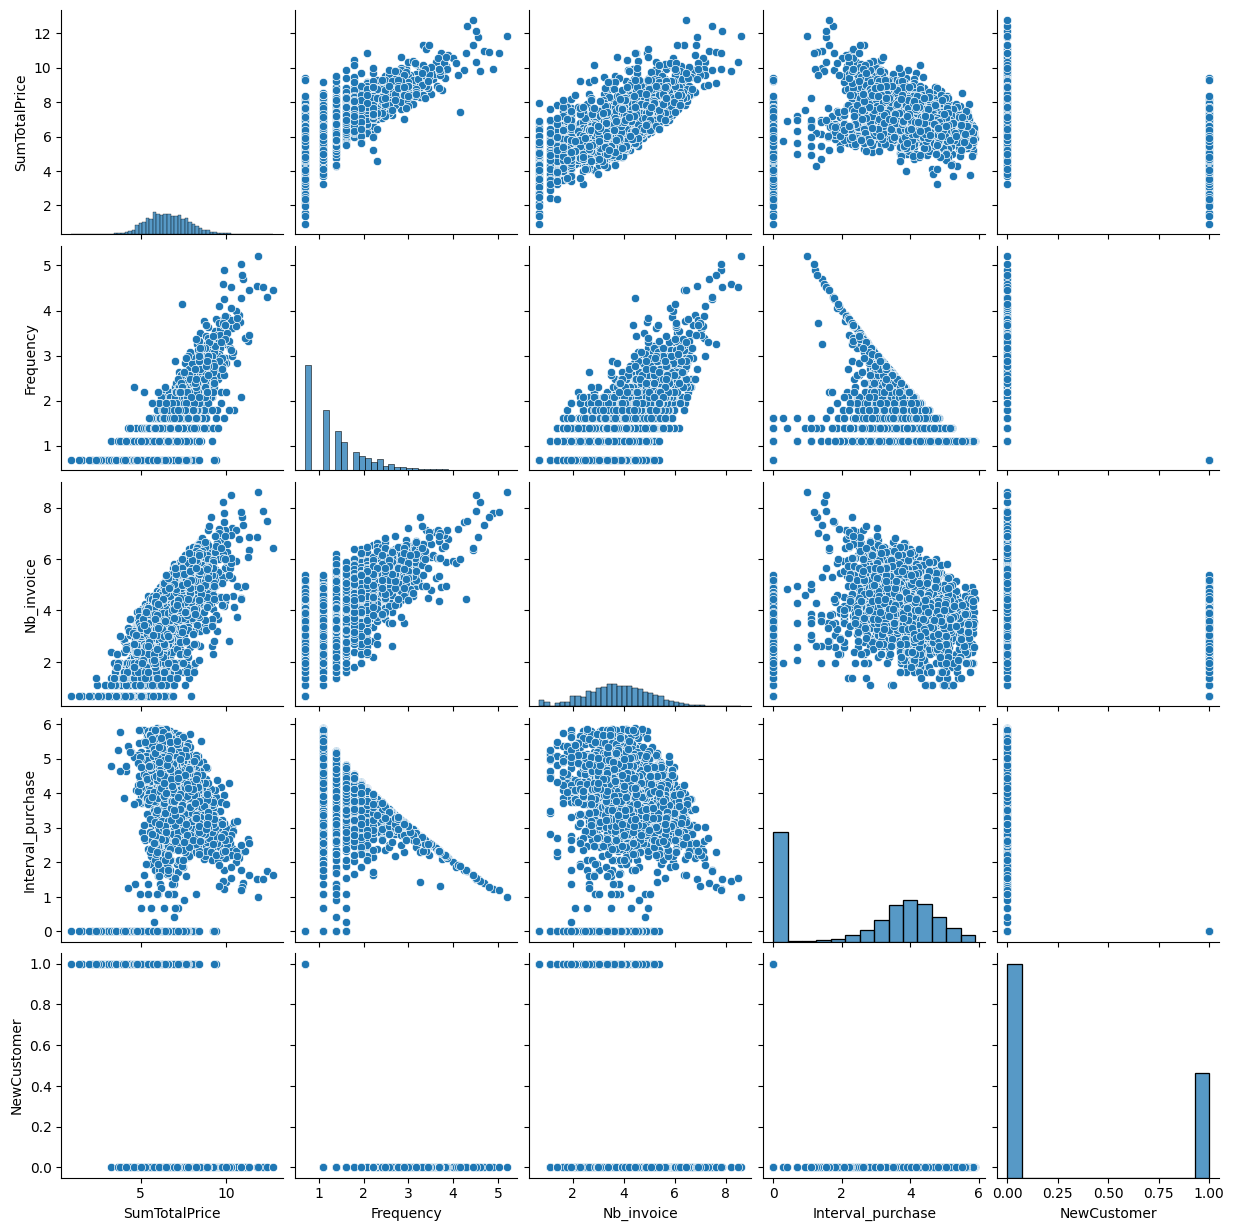

In [45]:
sns.pairplot(df_agg_log.drop(['Customer ID'], axis=1))

In [46]:
fig = px.scatter_3d(df_agg_log, x='SumTotalPrice', y='Interval_purchase', z='Nb_invoice')
fig.show()

### Clustering

#### Normalization

In [47]:
variable = df_agg.drop(['Customer ID'], axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(variable)

df_scaled = pd.DataFrame(df_scaled, columns=variable.columns)

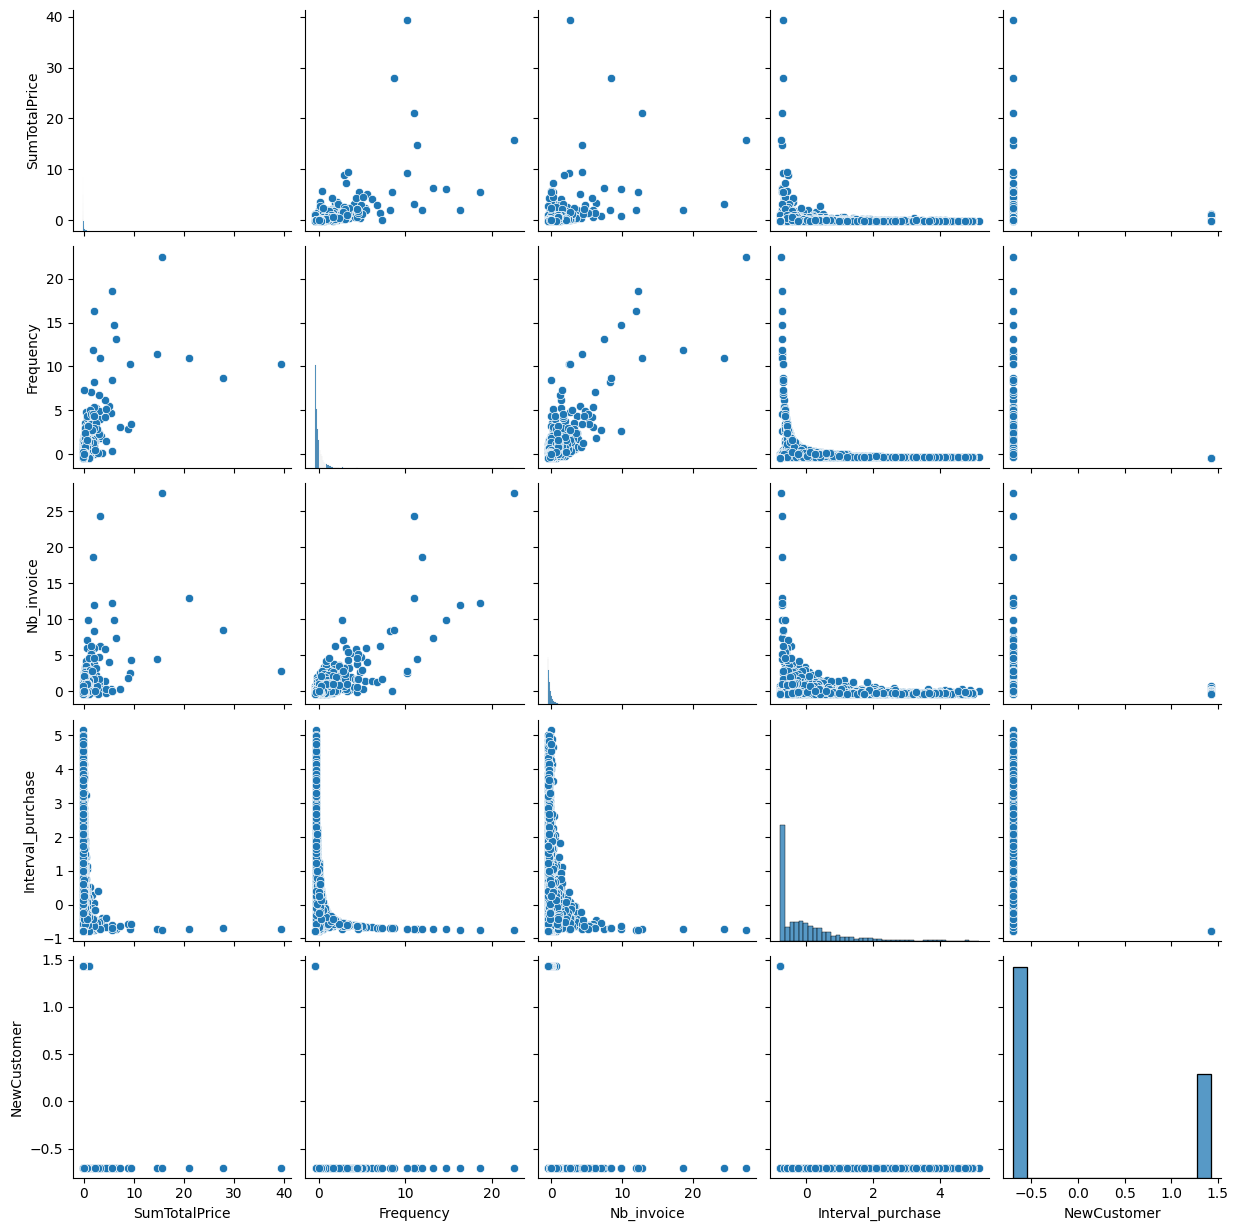

In [48]:
sns.pairplot(df_scaled)

#### Kmeans

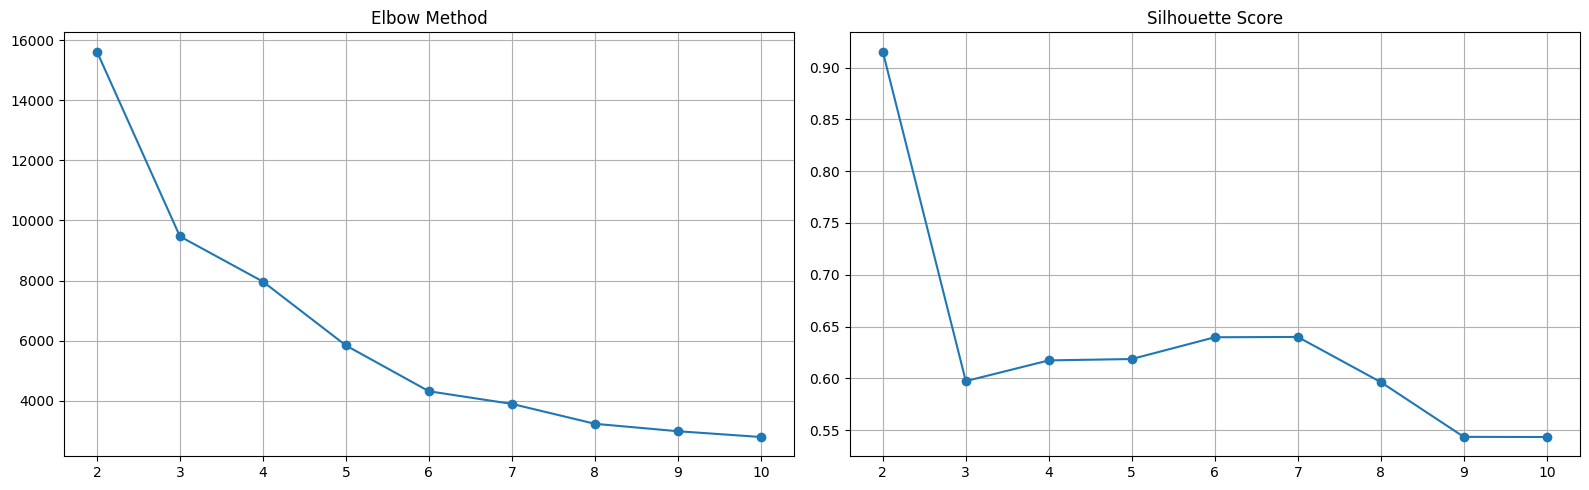

In [ ]:
# Elbow Method and Sihlouette score to find the best clustering number
k_range = range(2,11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

score = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    s_score = silhouette_score(df_scaled, kmeans.fit_predict(df_scaled))
    score.append(s_score)

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_range, score, marker='o')
plt.title('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

According to the 2 graphsics, n_clustors = 6 seems like the best choice for our dataset.

In [50]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=6, random_state=42)

In [51]:
df_cluster_added = df_agg.copy()
df_log_cluster_added = df_agg_log.copy()

In [52]:
df_cluster_added['Cluster'] = kmeans.labels_
df_log_cluster_added['Cluster'] = kmeans.labels_

In [ ]:
# To be able to display the real value of variables in axis:
def get_ticks_limit(df, col):
    col_log = df[col]
    col_ticks_log = np.linspace(col_log.min(), col_log.max(), 10)
    return col_ticks_log

def get_ticks_real(list):
    return [f'{np.expm1(i):.0f}' for i in list]

x, y, z = ['SumTotalPrice','Interval_purchase', 'Nb_invoice']

x_ticks_log_limit = get_ticks_limit(df_log_cluster_added, x)
y_ticks_log_limit = get_ticks_limit(df_log_cluster_added, y)
z_ticks_log_limit = get_ticks_limit(df_log_cluster_added, z)

x_ticks_real = get_ticks_real(x_ticks_log_limit)
y_ticks_real = get_ticks_real(y_ticks_log_limit)
z_ticks_real = get_ticks_real(z_ticks_log_limit)

axis_real_ticks = dict(
                        xaxis = {
                            'title' : x,
                            'tickvals' : x_ticks_log_limit,
                            'ticktext' : x_ticks_real
                        },
                        yaxis = {
                            'title' : y,
                            'tickvals' : y_ticks_log_limit,
                            'ticktext' : y_ticks_real
                        },
                        zaxis = {
                            'title' : z,
                            'tickvals' : z_ticks_log_limit,
                            'ticktext' : z_ticks_real
                        }
                    )

In [55]:
fig = px.scatter_3d(df_log_cluster_added, x='SumTotalPrice', y='Interval_purchase', z='Nb_invoice', color=kmeans.labels_, opacity=0.5)
fig.update_layout(scene = axis_real_ticks)
fig.show()

In [56]:
df_cluster_added.groupby('Cluster', as_index=False).mean()

,Cluster,Customer ID,SumTotalPrice,Frequency,Nb_invoice,Interval_purchase,NewCustomer
0,0,"15,364.77","1,901.38",5.09,102.18,49.16,0.00
1,1,"15,392.18","13,553.78",23.31,499.88,18.10,0.00
2,2,"15,354.06",352.26,1.00,21.97,0.00,1.00
3,3,"16,374.00","298,388.92",79.00,"1,190.00",4.43,0.00
4,4,"15,322.64",828.34,2.37,50.32,178.87,0.00
5,5,"14,911.78","76,867.25",118.67,"2,908.44",2.93,0.00


In [67]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

fig = px.scatter(x=df_pca[:,0], y=df_pca[:,1], color=kmeans.labels_)
fig.update_layout(
    title = 'PCA',
    xaxis_title = 'PCA_1',
    yaxis_title = 'PCA_2'
)
fig.show()

##### DBSCAN

In [90]:
# Find the best params for model 
eps = np.arange(0.1, 1.0, 0.1)
min_samples = range(2, 11)

best_score = -1 
best_params = None

for e in eps:  
    for min_sample in min_samples :
        dbscan = DBSCAN(eps=e, min_samples=min_sample)
        labels = dbscan.fit_predict(df_scaled)

        if len(set(labels)) > 1:
            score = silhouette_score(df_scaled, labels)

            if score > best_score:
                best_score = score
                best_params = {'eps': e, 'min_samples': min_sample}

print(f"Best Parameters: {best_params}, Best Silhouette Score: {best_score:.2f}")

Best Parameters: {'eps': 0.6, 'min_samples': 7}, Best Silhouette Score: 0.62


In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=7)
df_dbscan = dbscan.fit_predict(df_scaled)

In [86]:
fig = px.scatter_3d(df_log_cluster_added, x=x, y=y, z=z, color=df_dbscan, opacity=0.5)
fig.update_layout(scene = axis_real_ticks)

fig.show()

In [88]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

fig = px.scatter(x=df_pca[:,0], y=df_pca[:,1], color=df_dbscan)
fig.update_layout(
    title = 'PCA',
    xaxis_title = 'PCA_1',
    yaxis_title = 'PCA_2'
)
fig.show()